# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Здравствуйте, уважаемый проверяющий. Надеюсь вам понравится проверять эту работу. Хорошего дня!


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 14]
# -- В прод:

# from coin import coin, uniform_pdf, norm_pdf, expon_pdf

# -- Для запуска локально:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

# -- end of section --

def uniform(size=1, precision=30):
    shape = (precision, *((size,) if isinstance(size, int) else size))
    return (coin(size=shape) * np.logspace(np.ones(size), np.ones(size)*precision, num=precision, base=0.5)).sum(0)


def plot_uniform_density(size=200):
    values = uniform(size)
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes()
    ax.set_title("Равномерное распределение", fontsize=18)
    grid = np.linspace(-0.25, 1.25, 500)
    ax.hist(values, bins=10, density=True, alpha=0.4, label='Гистограмма выборки', color='blue')
    ax.scatter(x=values, y=[0]*size, alpha=0.4, label='Распределение', color='yellow', s=75)
    ax.plot(grid, uniform_pdf(grid), label='Плотность равномерного распр.', lw=2, color='red')
    ax.legend(fontsize=14, loc=1)
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    fig = plt.figure(figsize=(15, 3))
    plt.suptitle("Равн. распределение с разной точностью", fontsize=18)
    
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        ax = plt.subplot(3, 2, i + 1)
        ax.set_ylabel(f"Точность {precision}", rotation=0, labelpad=50)
        
        plt.scatter(
          uniform(size, precision),
          np.zeros(size),
          alpha=0.4
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    plt.subplots_adjust(left=0.1, wspace=0.3)

    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    norm = np.sin(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))
    return loc + scale * norm


def plot_normal_density(size=200):
    values = normal(size)
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes()
    ax.set_title("Нормальное распределение", fontsize=18)
    grid = np.linspace(-3, 3, 500)
    ax.hist(values, bins=10, density=True, alpha=0.4, label='Гистограмма выборки', color='blue')
    ax.scatter(x=values, y=[0]*size, alpha=0.4, label='Распределение', color='yellow', s=75)
    ax.plot(grid, norm_pdf(grid), label='Плотность нормального распр.', lw=2, color='red')
    ax.legend(fontsize=14, loc=1)
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    f = lambda x: -np.log(-x+1)/lambd
    return f(uniform(size, precision))


def plot_expon_density(size=100):
    values = expon(size)
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes()
    ax.set_title("Экспоненциальное распределение", fontsize=18)
    grid = np.linspace(-0.5, 5, 500)
    ax.hist(values, bins=10, density=True, alpha=0.4, label='Гистограмма выборки', color='blue')
    ax.scatter(x=values, y=[0]*size, alpha=0.4, label='Распределение', color='yellow', s=75)
    ax.plot(grid, expon_pdf(grid), label='Плотность экспоненциального распр.', lw=2, color='red')
    ax.legend(fontsize=14, loc=1)
    return plt.gcf()


/var/folders/f_/sjlzzg253rvb0z3z8rgd7nlw0000gn/T/ipykernel_8952/2885689551.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_density().show()


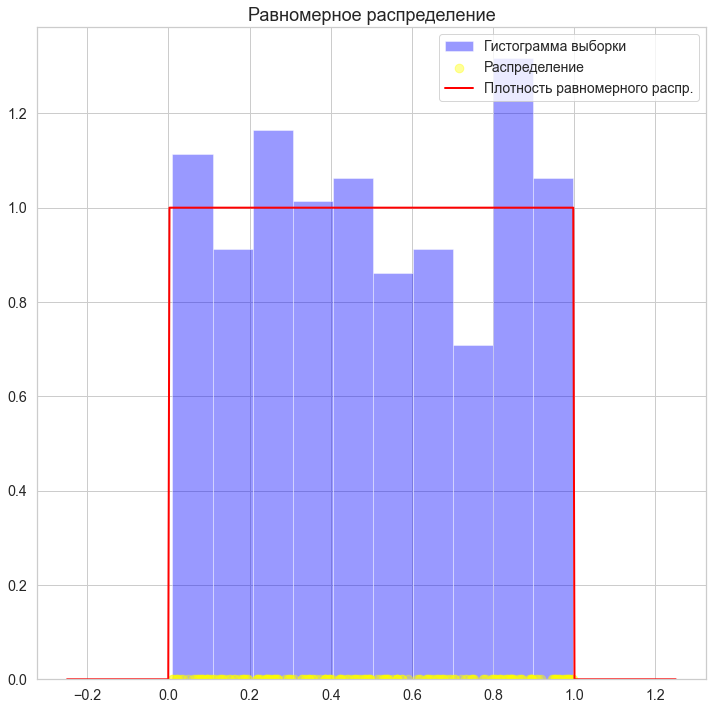

In [16]:
plot_uniform_density().show()

/var/folders/f_/sjlzzg253rvb0z3z8rgd7nlw0000gn/T/ipykernel_8952/2182246974.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_different_precision().show()


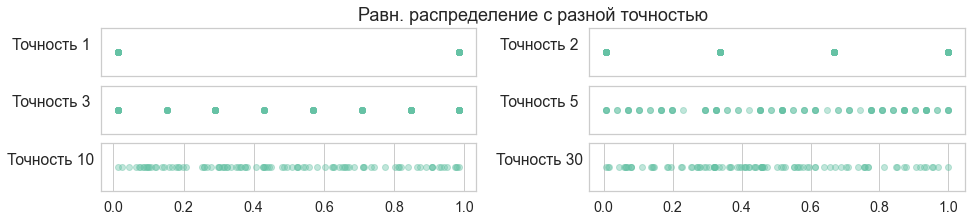

In [17]:
plot_uniform_different_precision().show()

/var/folders/f_/sjlzzg253rvb0z3z8rgd7nlw0000gn/T/ipykernel_8952/3212600516.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_normal_density().show()


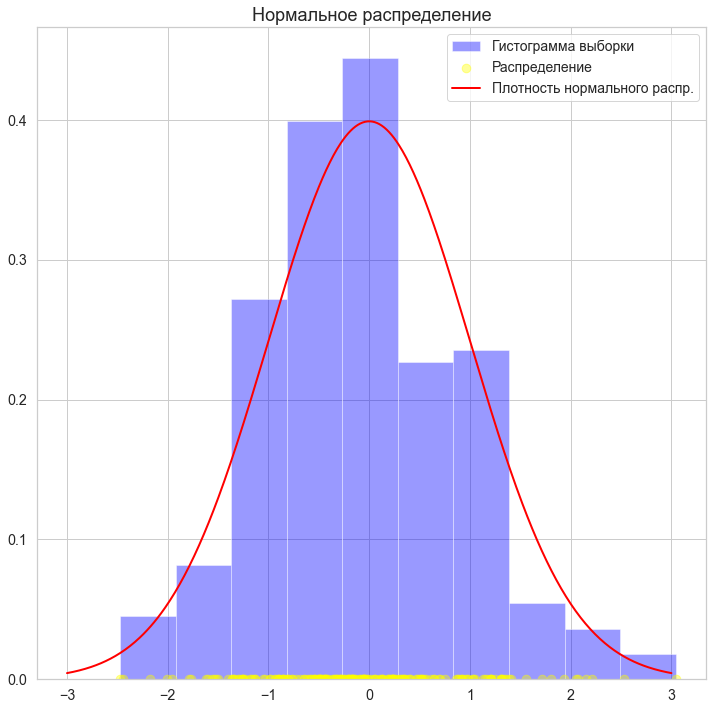

In [18]:
plot_normal_density().show()

/var/folders/f_/sjlzzg253rvb0z3z8rgd7nlw0000gn/T/ipykernel_8952/994590073.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_expon_density().show()


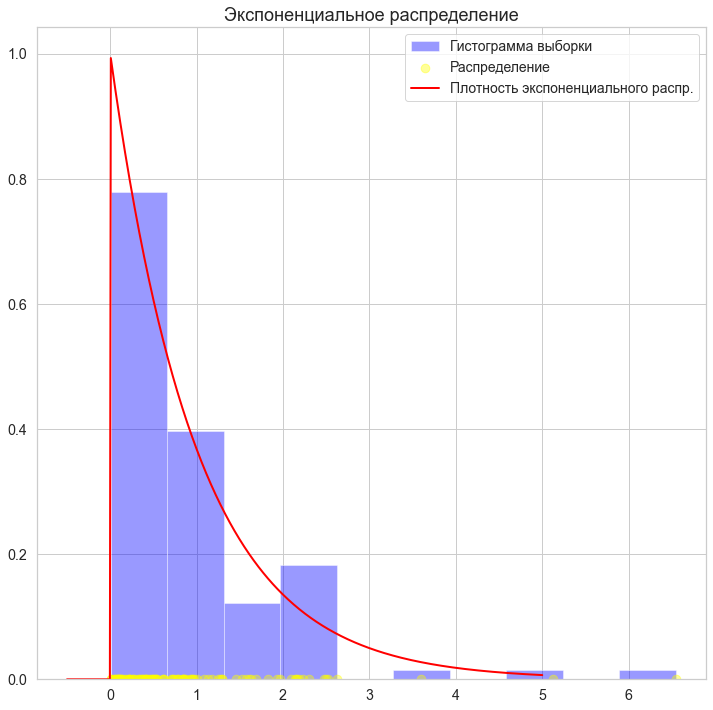

In [19]:
plot_expon_density().show()

**Выводы: Теория(функции плотности) совпала с практикой(гистограммы распределений), а значит наши функции генерации выборок работают корректно. Хотя, конечно, видно что совпадение не идеальное - ведь сэмплы не слишком большие, а бинов не так много. Также видно, что чем больше параметр precision, тем больше uniform похоже на равномерное распределение.**

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

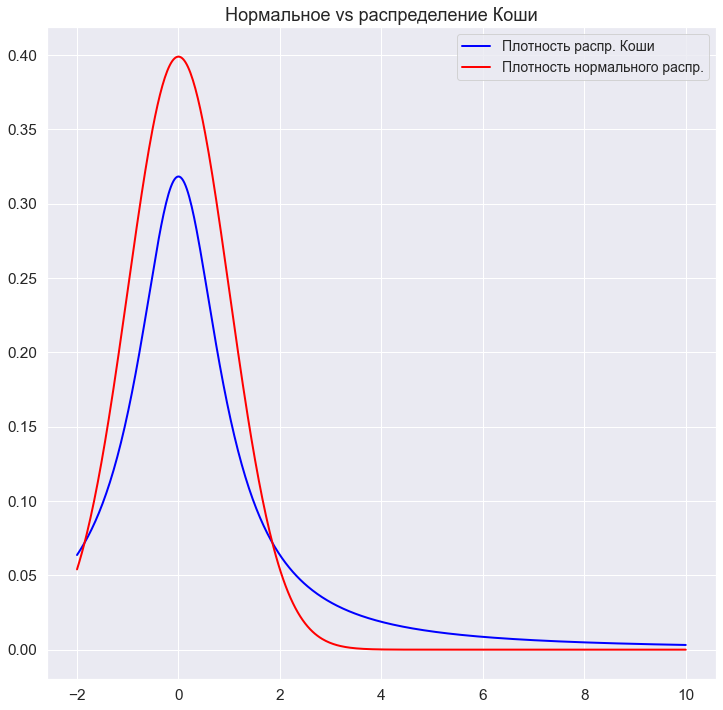

In [20]:
import scipy.stats as sps
sns.set(font_scale=1.4, palette='summer')

fig = plt.figure(figsize=(12, 12))
ax = plt.axes()
ax.set_title("Нормальное vs распределение Коши", fontsize=18)
grid = np.linspace(-2, 10, 500)
ax.plot(grid, sps.cauchy.pdf(grid), label='Плотность распр. Коши', lw=2, color='blue')
ax.plot(grid, sps.norm.pdf(grid), label='Плотность нормального распр.', lw=2, color='red')
ax.legend(fontsize=14, loc=1);

**Вывод: Плотность распределения Коши действительно убывает медленнее, чем у других, при стремлении x->inf**

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Сгенерируем большое количество независимых наборов случайных величин

In [21]:
size = 500
samples_count = 1000

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1);

И нарисуем их всех одним цветом, выставляя прозрачность объектов

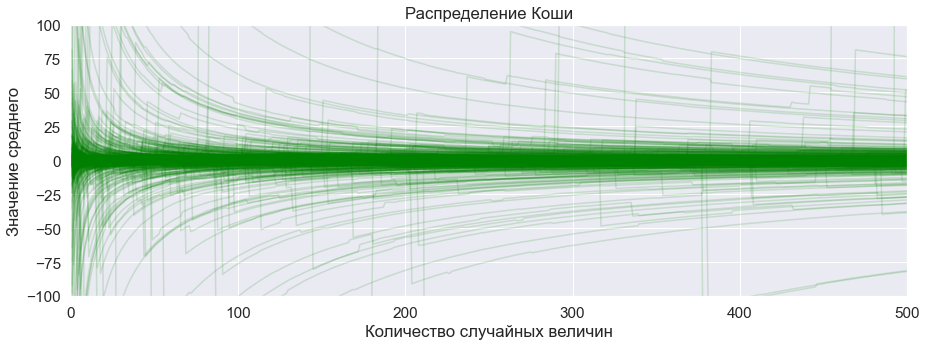

In [22]:
plt.figure(figsize=(15, 5))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.15)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title("Распределение Коши")
plt.xlim((0, size));
plt.ylim((-100, 100));

**Вывод: Закон больших чисел не выполняется (а ведь и нечему выполняться, если у распр. Коши нет матож-а). Это можно обосновать тем, что поскольку у распр. Коши "тяжёлый хвост", то остаётся велика вероятность выбросов (больших по модулю чисел), которые перебивают значение медианы значительно.**

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Посчитаем кумулятивные медианы, используя сгенерированные ранее сэмплы.

In [23]:
medians = []
for i in range(size):
    medians += [np.median(samples[:,:i+1],  axis=1)]
medians = np.array(medians).T

И нарисуем их всех одним цветом, выставляя прозрачность объектов

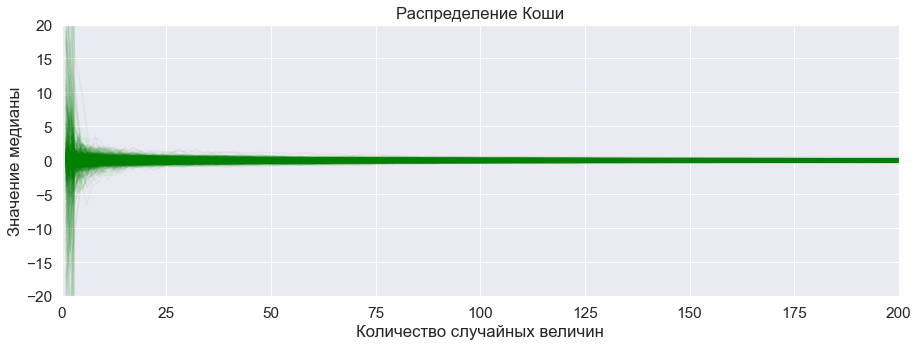

In [25]:
plt.figure(figsize=(15, 5))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.title("Распределение Коши")
plt.xlim((0, 200));
plt.ylim((-20, 20));

**Вывод: Неожиданно выборочная медиана стремится к 0 при стремлении количества случайных величин в выборке, распределённых по Коши, к бесконечности. Таким образом, исходя из всех полученных графиков, распределение Коши сосредоточено около 0, но имеет значительное число выбросов, визуально отделимых от 0.**

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [30]:
K = 500
max_deviation = 0.02
a = 0.5

def F(n, a):
    return np.abs(np.average(sps.bernoulli(p=a).rvs((K, n)), axis=-1) - a).sum() / K

def find_sample_size(a, maxN=500):
    return np.where(np.vectorize(lambda x: F(x, a) <= max_deviation)(np.arange(maxN) + 1))[0].min() + 1

print(f"Searched value: {find_sample_size(a)}")

Searched value: 363


Теперь визуализруем зависимость F в обычном и логарифмическом масштабах.

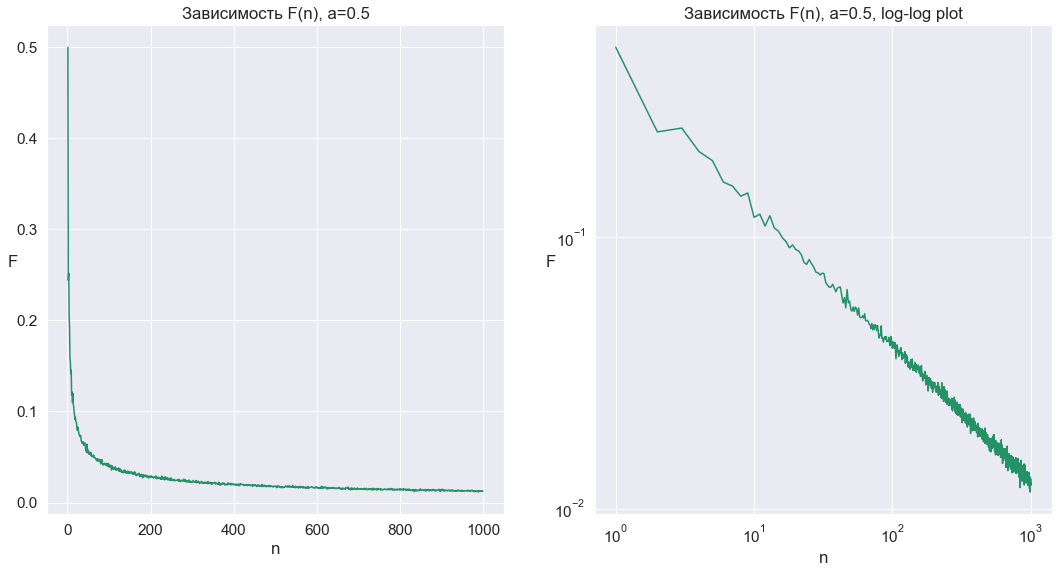

In [36]:
maxN = 1000
values = np.vectorize(lambda x: F(x, a))(np.arange(maxN) + 1)
figure = plt.figure(figsize=(18, 9))

def setup_axes(ax, logscale=False):
    descr = (", log-log plot" if logscale else "")
    ax.set_title(f"Зависимость F(n), a={a}{descr}")
    ax.set_ylabel("F", rotation=0)
    ax.set_xlabel("n")
    
ax = plt.subplot(1, 2, 1)
ax.plot(np.arange(maxN) + 1, values)
setup_axes(ax)

ax = plt.subplot(1, 2, 2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(np.arange(maxN) + 1, values)
setup_axes(ax, True);

**Промежуточные рассуждения**\
Попытаемся понять, почему графики выглядят так.\
Наша $F(n)$ это некоторое подобие дисперсии.\
В каком-то смысле, исходя из формулы, это $E(|g - E(g)|)$, где $g$ - случайна величина, действующая на $\{0,1\}^n$:\
$g((x_1,x_2,...,x_n)) = \frac{\sum(x_i)}{n}$

Из курса теории вероятности, используя биномиальное распределение в качестве подсказки и свойства мат.ожидания и дисперсии:\
$E(g) = a$\
$D(g) = \frac{n * a * (1 - a)}{n^2} = \frac{a * (1 - a)}{n}$\
Уже сейчас проглядывается, откуда на графике возникает обратная зависимость, поскольку $F = E(|g - E(g)|)$ примерно равна $\sqrt{E(g - E(g))^2} = \sqrt{D(g)} = \sqrt{\frac{a * (1 - a)}{n}}$.

Однако наша цель - посчитать в точности $E(|g - a|)$. Для простоты положим a = 0.5.\
**Доказательство:**\
$E(|g - a|) = \sum_{k=0}^{n}|\frac{k}{n} - 0.5|*C_{n}^{k}*\frac{1}{2^n}$\
$=\sum_{k=0}^{\frac{n}{2}}(0.5 - \frac{k}{n})*C_{n}^{k}*\frac{1}{2^n} + \sum_{k=\frac{n}{2}+1}^{n}(\frac{k}{n} - 0.5)*C_{n}^{k}*\frac{1}{2^n}$\
$=\sum_{k=0}^{\frac{n}{2}}(\frac{n - 2k}{n})*C_{n}^{k}*\frac{1}{2^n}$\
$=\sum_{k=0}^{\frac{n}{2}}C_{n}^{k}*\frac{1}{2^n} - \frac{2}{n}*\sum_{k=0}^{\frac{n}{2}}k*C_{n}^{k}*\frac{1}{2^n}$\
$= 0.5 - \frac{2}{n} * \sum_{k=1}^{\frac{n}{2}}n*C_{n-1}^{k-1}*\frac{1}{2^n}$\
$= 0.5 - \frac{2}{n} * \sum_{k=0}^{\frac{n}{2}-1}n*C_{n-1}^{k}*\frac{1}{2^n}$\
$= 0.5 - \frac{1}{2^{n-1}} * \sum_{k=0}^{\frac{n}{2} - 1}C_{n-1}^{k}$ $\quad\quad$ // Заметим не хватает среднего члена, чтобы свернуть в половину степени двойки\
$= 0.5 - 0.5 + \frac{1}{2^{n-1}} * T * C_{n-1}^{\frac{n-1}{2}}$ $\quad\quad$ // Средний член умноженный на константу $T \in \{1,\frac{1}{2}\}$\
$\approx \frac{1}{\sqrt{\pi*n}}$

Надеюсь автору будут прощены некоторые нестрогие переходы, ведь хотелось за конечное время понять как примерно выглядит эта формула, не вдаваясь в подробности. Самое главное - мы получили $\sqrt{n}$ в знаменателе, будем отталкиваться от этого при приближении функции.

**Замечание:** используем [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) на втором графике, чтобы удостовериться в зависимости $F = \frac{C}{\sqrt{n}}$, исходя из коэффициента наклона $k = -\frac{1}{2}$

Теперь, попробуем приблизить функцию F при a = 0.5.

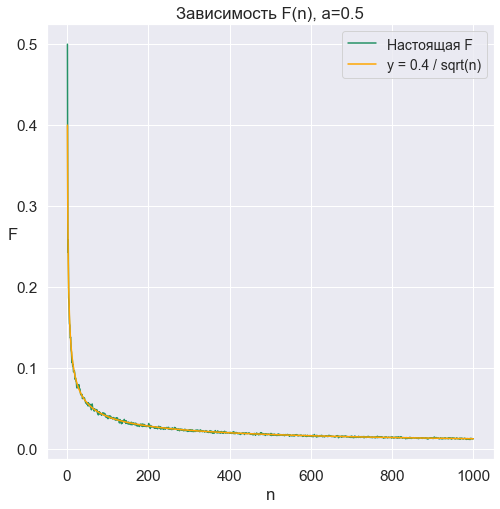

In [32]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
n_range = np.arange(maxN) + 1
ax.plot(n_range, values, label='Настоящая F')
ax.plot(n_range, 0.4 / np.sqrt(n_range), label='y = 0.4 / sqrt(n)', color='orange')
setup_axes(ax)
ax.legend(fontsize=14, loc=1);

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

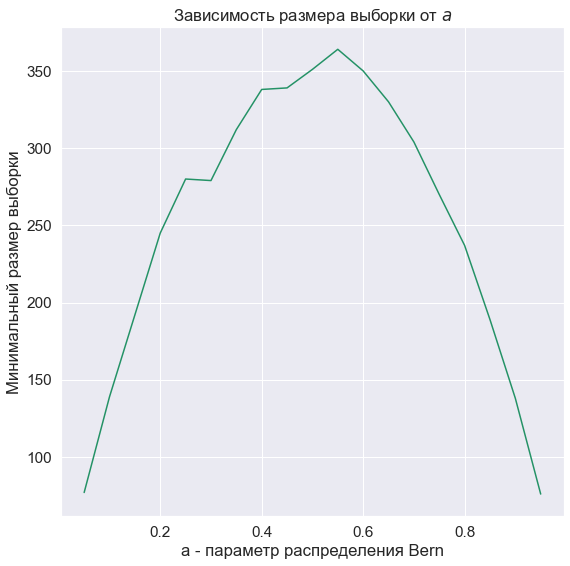

In [33]:
a_range = np.arange(0.05, 1, 0.05)
figure = plt.figure(figsize=(9, 9))
ax = plt.axes()
ax.plot(a_range, np.vectorize(find_sample_size)(a_range))
ax.set_ylabel("Минимальный размер выборки")
ax.set_xlabel("a - параметр распределения Bern")
ax.set_title("Зависимость размера выборки от $a$");

**Выводы:**
- Зависимость $F(n)$ - гиперболична, при $a=0.5$ приближается функцией $y = \frac{0.4}{\sqrt{x}}$. Иными словам, при достаточно большом количестве случайных величин значение среднего не сильно отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения.

- График зависимости Минимального размера выборки (обозначим min_sample_size) от $a$ - симметричен относительно $a=0.5$ и достигает максимума в этой точке (min_sample_size ≈ 350). Обосновать это можно схожестью введённой функции $\sqrt{D(g)} = \sqrt{\frac{a*(1-a)}{n}}$ и самой F.\
Парабола $a(1-a)$ достигает максимума в $a=0.5$. Порядок на F очевидно индуцирует порядок на min_sample_size.